<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as st

In [2]:
#Строим доверительный интервал для a=M(X)

In [3]:
### задаем параметры нормального распредеелния
n=25
a=0
Sigma=1
#########################################
gamma=0.95 ### доверительная вероятность

In [4]:
#### генерируем выборку из нормально распределенной СВ X
X= np.random.normal(a,Sigma,size = n)

In [5]:
### Percent point function =ppf
P_=0.99
t_gamma=st.norm.ppf(P_, loc=0, scale=1)
print("t_gamma=F_s_INVERSE(",P_,")=",t_gamma)
ppp=st.norm.cdf(t_gamma, loc=0, scale=1)

print("P(U<",t_gamma,")=F_S(",t_gamma,")=",ppp)

t_gamma=F_s_INVERSE( 0.99 )= 2.3263478740408408
P(U< 2.3263478740408408 )=F_S( 2.3263478740408408 )= 0.99


In [6]:
#### Вычисляем "вручную" границы интервальной оценки математического ожидания 
##нормально распределенной СВ X
### для случая известной дисперсии
#### 
P_=1/2+gamma/2
t_gamma=st.norm.ppf(P_, loc=0, scale=1)
a_left_ =X.mean()-Sigma*t_gamma/n**0.5
a_right_=X.mean()+Sigma*t_gamma/n**0.5
print('доверительный интервал для параметра a')
(a_left_,a_right_)

доверительный интервал для параметра a


(np.float64(-0.66041833102204), np.float64(0.12356726279398161))

In [7]:
#### Вычисляем "вручную" границы интервальной оценки математического ожидания 
##нормально распределенной СВ X
### для случая известной дисперсии
#### с помощью встроенных статистических функций Питона
a_estimate=np.mean(X)
interval_estimate_1=st.norm.interval(alpha=gamma, 
              loc=a_estimate,
              scale=Sigma/np.sqrt(n)) 
print(interval_estimate_1)

TypeError: rv_generic.interval() missing 1 required positional argument: 'confidence'

In [ ]:
#### Вычисляем границы интервальной оценки математического ожидания при неизвестной дисперсии
#### "вручную"
interval_for_MX_=[0]*2
### Percent point function =ppf= Inverse CDF
t_gamma_0=st.t.ppf(1/2+gamma/2, df=len(X)-1)
print(t_gamma_0)
a_estimate=np.mean(X)
sigma_estimate=np.std(X,ddof=1)
interval_for_MX_[0]=a_estimate-sigma_estimate*t_gamma_0/np.sqrt(n)
interval_for_MX_[1]=a_estimate+sigma_estimate*t_gamma_0/np.sqrt(n)
print(interval_for_MX_)

2.0638985616280205
[-0.4436982402031126, 0.34599989301234507]


In [ ]:
### Способ № 1
#### Вычисляем границы интервальной оценки математического ожидания при неизвестной дисперсии
#### с помощью встроенных статистических функц_0, df=len(X)-1,
a_estimate=np.mean(X)
sigma_estimate=np.std(X,ddof=1)
interval_estimate_2=st.t.interval(alpha=gamma, df=len(X)-1,
              loc=a_estimate,
              scale=sigma_estimate/np.sqrt(n)) 
print(interval_estimate_2)

(-0.4436982402031126, 0.34599989301234507)


In [ ]:
### Способ № 2
#### Вычисляем границы интервальной оценки математического ожидания при неизвестной дисперсии
#### с помощью встроенных статистических функций Питона
interval_estimate_2=st.t.interval(alpha=gamma, df=len(X)-1,
              loc=a_estimate,
              scale=st.sem(X,ddof=1)) 
print(interval_estimate_2)
##### ПРОВЕРКА 
##### ПРИ ВЫЗОВЕ st.sem параметр ddof=0 ( и также по умолчанию ddof=0)
print(st.sem(X,ddof=1),sigma_estimate/np.sqrt(n))

(-0.4436982402031126, 0.34599989301234507)
0.19131224467556612 0.19131224467556612


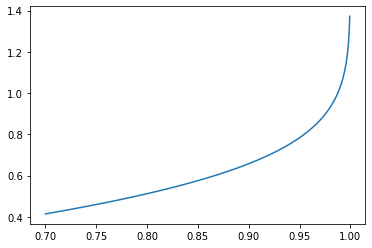

In [ ]:
##### Изучаем зависимость точности интервальной оценки для MX при известной дисперсии от надежности 
#### при неизменном объему выборки
#################################
sample = np.random.normal(a, Sigma, n)
a_estimate=np.mean(sample)
##################################
V=500
### массив gamma_ будет содержать V значений надежности
gamma_=[0.0]*V
### массив delta_ будет содержать V значений длин доверительных интервалов, отвечающих соответствующим надежностям
delta_=[0.0]*V
gamma__0=0.7
gamma__1=0.9999999999
h=(gamma__1-gamma__0)/V
for i in range(V):
    gamma_[i]=gamma__0+i*h
    interval_estimate_MX=st.norm.interval(alpha=gamma_[i], 
              loc=a_estimate, 
              scale=Sigma/np.sqrt(n)) 
    delta_[i]=interval_estimate_MX[1]-interval_estimate_MX[0]
###print(delta_)
plt.plot(gamma_,delta_)

Материалы к Лабораторной Работе №2

НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ. Оценивание надежности интервальной оценки M(X)

In [ ]:
### задаем параметры нормального распредеелния
n=25
a=0
Sigma=1
#########################################
t_gamma=2.064 ## n=25
V=50 ### число точечных оценок надежности gamma=0.95
M=4000 ### число интервальных оценок
################################
COUNT_=[0]*V
P_hat=[0.0]*V
a_left=[0.0]*M
a_right=[0.0]*M
for j in range(V):
    for i in range(M):
        X= np.random.normal(a,Sigma,size = n)
        S=np.std(X,ddof=1)
        a_left[i] =X.mean()-S*t_gamma/n**0.5
        a_right[i]=X.mean()+S*t_gamma/n**0.5
    s0=pd.Series(data=a_left)
    ##print(s0)
    s1=pd.Series(data=a_right)
    COUNT_[j]=((s0<a)&(s1>a)).sum()
    P_hat[j]=COUNT_[j]/M
print(P_hat)

[0.94775, 0.9505, 0.94775, 0.9485, 0.94975, 0.95025, 0.94875, 0.95875, 0.95425, 0.95, 0.948, 0.9475, 0.946, 0.945, 0.95075, 0.9465, 0.953, 0.95225, 0.95275, 0.945, 0.949, 0.94525, 0.94625, 0.9495, 0.95025, 0.95125, 0.94875, 0.95475, 0.94925, 0.948, 0.94775, 0.95125, 0.94775, 0.95, 0.94275, 0.9535, 0.95525, 0.9415, 0.9475, 0.94325, 0.947, 0.95175, 0.9455, 0.96075, 0.94625, 0.95875, 0.944, 0.94975, 0.94925, 0.949]


In [ ]:
print(np.mean(P_hat),np.std(P_hat,ddof=1))

0.9493550000000001 0.003967370099978589


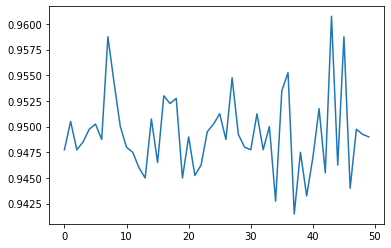

In [ ]:
plt.plot(P_hat)

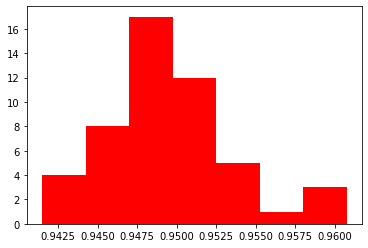

In [ ]:
count, bins, ignored  = plt.hist(P_hat,bins='sturges',color='r')

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


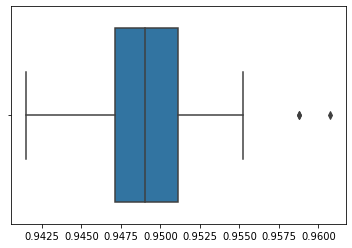

In [ ]:
import seaborn as sb
W=sb.boxplot(P_hat)
print(W)

In [ ]:
n=25
V=50 ### число точечных оценок надежности gamma=0.95
M=4000 ### число интервальных оценок
COUNT_=[0]*V
sigma_left=[0.0]*M
sigma_right=[0.0]*M
delta_0=39.4 ### n=25 
delta_1=12.4 ### n=25 
COUNT_=[0]*V
S2_left=[0.0]*M
type(S2_left)
S2_right=[0.0]*M
for j in range(V):
    for i in range(M):
        X= np.random.normal(a,Sigma,size = n) ### 
        DX=Sigma**2
        D_hat=np.var(X,ddof=1)
        S2_left[i] =(n-1)*D_hat/delta_0
        S2_right[i]=(n-1)*D_hat/delta_1
    s0=pd.Series(data=S2_left)
    s1=pd.Series(data=S2_right)
    COUNT_[j]=((s0<DX)&(s1>DX)).sum()
    COUNT_[j]=COUNT_[j]/M
print(COUNT_)

[0.95575, 0.95, 0.9495, 0.952, 0.953, 0.9435, 0.95025, 0.952, 0.946, 0.95525, 0.9485, 0.9565, 0.9505, 0.9535, 0.957, 0.94275, 0.9495, 0.94575, 0.953, 0.95125, 0.95375, 0.9485, 0.94725, 0.94875, 0.945, 0.9515, 0.95175, 0.9515, 0.94825, 0.94325, 0.949, 0.94875, 0.95025, 0.952, 0.957, 0.956, 0.951, 0.94975, 0.9515, 0.954, 0.9575, 0.9475, 0.953, 0.9475, 0.9445, 0.9515, 0.9525, 0.953, 0.95325, 0.9565]


In [ ]:
s=pd.DataFrame(data=COUNT_,columns=['COUNT'])
s

,COUNT
0,0.95575
1,0.95000
2,0.94950
3,0.95200
4,0.95300
5,0.94350
6,0.95025
7,0.95200
8,0.94600
9,0.95525


<AxesSubplot:>

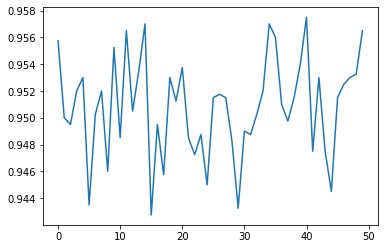

In [ ]:
s.COUNT.plot()

In [ ]:
(s.mean(),s.std())

(COUNT    0.95082
 dtype: float64,
 COUNT    0.003741
 dtype: float64)